<a href="https://colab.research.google.com/github/thessafuzaro/ANN/blob/main/Projeto_Thessa_treino_Teste_autor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
'''Primeiro projeto de redes neurais
Aluna: Thessa Fuzaro Mendes
Artigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]
Data: 11/05/2021'''

'Primeiro projeto de redes neurais\nAluna: Thessa Fuzaro Mendes\nArtigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]\nData: 11/05/2021'

In [311]:
#Bibliotecas necessárias
import os
import numpy as np   # biblioteca númerica do python
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

#np.random.seed(0)

In [312]:
# para gerar o grafico no browser
%matplotlib inline

In [313]:
!git clone https://github.com/thessafuzaro/ANN
%cd ANN

Cloning into 'ANN'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 114 (delta 66), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (114/114), 117.34 KiB | 5.10 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN


In [314]:
# leitura dos dados
df=pd.read_csv("Dados_artigo_redes_neurais_atualizados.csv", delimiter=';')   # pelo pandas (pd) lê o arquivo no formato csv - arquivo de dados como o excel
print (df.head)


<bound method NDFrame.head of     No    Range  Mean_size  Collector_dosage  Impeller_speed  Recovery  Grade
0    1    16-32        750              0.90            1100     98.47  65.18
1    2   16-150        553              0.56            1200     92.71  65.36
2    3  150-270         79              0.67            1200     68.51  77.53
3    4   32-270        277              1.12            1200     93.90  52.68
4    5   24-270        380              0.90            1500     82.99  64.29
5    6   32-270        277              0.78            1200     95.69  62.93
6    7    16-24        854              0.90            1200     94.19  76.38
7    8   16-150        553              0.78            1500     66.15  67.67
8    9   24-270        380              1.12            1100     97.68  56.07
9   10   32-270        277              0.67            1200     98.13  60.60
10  11    16-24        854              1.12            1200     97.71  76.91
11  12   16-150        553        

In [315]:
#Selecionando as colunas de interesse:
Dat_Select=df.iloc[:,2:].copy()

In [316]:
Dat_Select.head (5)

,Mean_size,Collector_dosage,Impeller_speed,Recovery,Grade
0,750,0.90,1100,98.47,65.18
1,553,0.56,1200,92.71,65.36
2,79,0.67,1200,68.51,77.53
3,277,1.12,1200,93.90,52.68
4,380,0.90,1500,82.99,64.29


In [317]:
# Normatização dos dados:
def Normatiza(x):
  strings= list(x)
  for i in strings:
    max_x=x[i].max()
    min_x=x[i].min()
    a=(max_x+min_x)/2
    b=(max_x-min_x)/2
    x[i]=(x[i]-a)/b
  return x
  
  #  x[i]=2*((x[i]-min_x)/(max_x-min_x))-1
  

In [318]:
# Retornando os dados para originais:
def Original(x,x_old):
  strings=list(x)
  for i in strings:
     max_x=x_old[i].max()
     min_x=x_old[i].min()
     a=(max_x+min_x)/2
     b=(max_x-min_x)/2
     x[i]=x[i]*b+a
  return x

In [319]:
#Separando os dados em normatizados e originais:
Dat_Old=[]
Dat_Old=Dat_Select.copy()
Dat=Normatiza(Dat_Select)

In [320]:
Dat

,Mean_size,Collector_dosage,Impeller_speed,Recovery,Grade
0,0.731613,0.214286,-1.0,0.977363,0.149156
1,0.223226,-1.000000,-0.5,0.624962,0.161557
2,-1.000000,-0.607143,-0.5,-0.855613,1.000000
3,-0.489032,1.000000,-0.5,0.697767,-0.712022
4,-0.223226,0.214286,1.0,0.030284,0.087840
5,-0.489032,-0.214286,-0.5,0.807281,-0.005856
6,1.000000,0.214286,-0.5,0.715509,0.920772
7,0.223226,-0.214286,1.0,-1.000000,0.320703
8,-0.223226,1.000000,-1.0,0.929030,-0.478471
9,-0.489032,-0.607143,-0.5,0.956562,-0.166380


In [321]:
#separa os dados em treino e teste -> Aqui os dados que eu coloquei no treino e teste foram identicos aos dados usados pelos autores
Train=Dat.iloc[0:25,:]
Test=Dat.iloc[26:,:]
#Separando os dados para treino e teste da Rede Neural
#Train=Dat.sample(frac=0.8,random_state=None)
#Test=Dat.drop(Train.index)

In [322]:
Train

,Mean_size,Collector_dosage,Impeller_speed,Recovery,Grade
0,0.731613,0.214286,-1.0,0.977363,0.149156
1,0.223226,-1.000000,-0.5,0.624962,0.161557
2,-1.000000,-0.607143,-0.5,-0.855613,1.000000
3,-0.489032,1.000000,-0.5,0.697767,-0.712022
4,-0.223226,0.214286,1.0,0.030284,0.087840
5,-0.489032,-0.214286,-0.5,0.807281,-0.005856
6,1.000000,0.214286,-0.5,0.715509,0.920772
7,0.223226,-0.214286,1.0,-1.000000,0.320703
8,-0.223226,1.000000,-1.0,0.929030,-0.478471
9,-0.489032,-0.607143,-0.5,0.956562,-0.166380


In [323]:
Test

,Mean_size,Collector_dosage,Impeller_speed,Recovery,Grade
26,-0.223226,1.000000,-0.5,0.781585,-0.455047
27,-0.223226,0.214286,-1.0,0.934537,-0.318636
28,-0.489032,-1.000000,-0.5,0.659223,0.063727
29,-0.223226,-0.214286,-1.0,0.642092,0.497761
30,0.731613,-1.000000,-0.5,0.737534,0.745091
31,-0.223226,1.000000,1.0,0.614561,0.093352
32,0.223226,-0.214286,-1.0,0.897828,-0.645884
33,0.731613,0.214286,-0.5,0.959621,0.373751
34,-0.223226,-0.214286,1.0,0.917406,0.840854


In [324]:
# Obtendo as variaveis independentes (treino e teste)
Index=[0,1,2]
x_Train=Train.iloc[:,Index]
x_Test=Test.iloc[:,Index]
X_Old=Dat_Old.iloc[:,Index]

In [325]:
# Obtendo as variaveis dependentes Recovery e Grade (treino e teste)
y_Train=Train.iloc[:,[3,4]]
y_Test=Test.iloc[:,[3,4]]
Y_Old=Dat_Old.iloc[:,[3,4]]

In [326]:
#Definindo a Rede Neural 
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,max_iter=2000,
                     hidden_layer_sizes=(9,11),random_state=6)

In [327]:
#Treinando a Rede Neural
model.fit(x_Train, y_Train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 11), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=6, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [328]:
# Usando a rede neural treina em calculos para treino e teste
y_Calc_Train=model.predict(x_Train)
y_Calc_Test=model.predict(x_Test)

In [329]:
# Transformando a saida da rede em dataframe 
y_Calc_Train=pd.DataFrame(y_Calc_Train)
y_Calc_Test=pd.DataFrame(y_Calc_Test)
Col_Names=list(y_Train)
y_Calc_Train.columns = Col_Names
y_Calc_Test.columns = Col_Names

In [330]:
# Transforma dos dados calculados na forma original (não normatizados)
y_Calc_Train=Original(y_Calc_Train,Y_Old)
y_Calc_Test=Original(y_Calc_Test,Y_Old)

In [331]:
# Recuperando os dados originais 
Test=[]
Train=[]
Train=Original(y_Train,Y_Old)
Test=Original(y_Test,Y_Old)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [332]:
Train

,Recovery,Grade
0,98.47,65.18
1,92.71,65.36
2,68.51,77.53
3,93.90,52.68
4,82.99,64.29
5,95.69,62.93
6,94.19,76.38
7,66.15,67.67
8,97.68,56.07
9,98.13,60.60


In [333]:
Test

,Recovery,Grade
26,95.27,56.41
27,97.77,58.39
28,93.27,63.94
29,92.99,70.24
30,94.55,73.83
31,92.54,64.37
32,97.17,53.64
33,98.18,68.44
34,97.49,75.22


In [334]:
# Escolhendo uma das resposta para fazer o gráfico (Teino - Recovery)
Obs_Train_Recovery=[]
Calc_Train_Recovery=[]
Calc_Train_Recovery=y_Calc_Train['Recovery'].copy()
Obs_Train_Recovery=Train['Recovery'].copy()

In [335]:
# Escolhendo uma das resposta para fazer o grafico (Teste- Recovery)
Obs_Test_Recovery=[]
Calc_Test_Recovery=[]
Calc_Test_Recovery=y_Calc_Test['Recovery'].copy()
Obs_Test_Recovery=Test['Recovery'].copy()

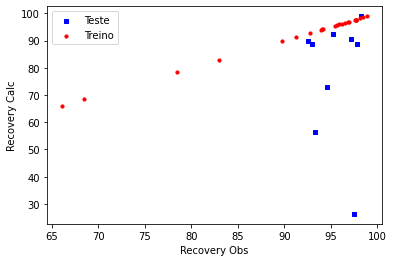

In [336]:
# Expressando os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Obs_Test_Recovery,Calc_Test_Recovery, s=10, c='b', marker="s", label='Teste')
ax1.scatter(Obs_Train_Recovery,Calc_Train_Recovery, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Recovery Calc')
plt.xlabel('Recovery Obs')
plt.show()

In [337]:
MSE_Recovery_Test=mean_squared_error(Obs_Test_Recovery,Calc_Test_Recovery)
print("MSE Recovery Teste=",MSE_Recovery_Test)
R2_Recovery_Test=r2_score(Obs_Test_Recovery,Calc_Test_Recovery)
print("R^2 Recovery Teste=",R2_Recovery_Test)

MSE Recovery Teste= 781.2521329592503
R^2 Recovery Teste= -174.49129182785614


In [338]:
MSE_Recovery_Train=mean_squared_error(Obs_Train_Recovery,Calc_Train_Recovery)
print("MSE Recovery Treino=",MSE_Recovery_Train)
R2_Recovery_Train=r2_score(Obs_Train_Recovery,Calc_Train_Recovery)
print("R^2 Recovery Treino=",R2_Recovery_Train)

MSE Recovery Treino= 0.003230742641686526
R^2 Recovery Treino= 0.9999577853978738


In [339]:
# Escolhendo uma das resposta para fazer o gráfico (Teino - Grade)
Obs_Train_Grade=[]
Calc_Train_Grade=[]
Calc_Train_Grade=y_Calc_Train['Grade'].copy()
Obs_Train_Grade=Train['Grade'].copy()

In [340]:
# Escolhendo uma das resposta para fazer o grafico (Teste- Recovery)
Obs_Test_Grade=[]
Calc_Test_Grade=[]
Calc_Test_Grade=y_Calc_Test['Grade'].copy()
Obs_Test_Grade=Test['Grade'].copy()

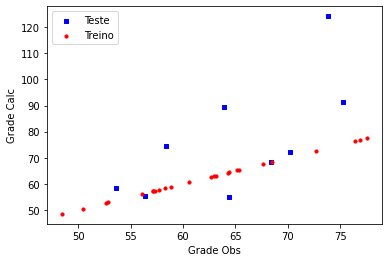

In [341]:
# Expressando os dois dados em figura (Grade)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Obs_Test_Grade,Calc_Test_Grade, s=10, c='b', marker="s", label='Teste')
ax1.scatter(Obs_Train_Grade,Calc_Train_Grade, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Grade Calc')
plt.xlabel('Grade Obs')
plt.show()

In [342]:
MSE_Grade_Test=mean_squared_error(Obs_Test_Grade,Calc_Test_Grade)
print("MSE Grade Teste=",MSE_Grade_Test)
R2_Grade_Test=r2_score(Obs_Test_Grade,Calc_Test_Grade)
print("R^2 Grade Teste=",R2_Grade_Test)

MSE Grade Teste= 425.8297951003372
R^2 Grade Teste= -7.158896193975426


In [343]:
MSE_Grade_Train=mean_squared_error(Obs_Train_Grade,Calc_Train_Grade)
print("MSE Grade Treino=",MSE_Grade_Train)
R2_Grade_Train=r2_score(Obs_Train_Grade,Calc_Train_Grade)
print("R^2 Grade Treino=",R2_Grade_Train)

MSE Grade Treino= 0.0003043295433523068
R^2 Grade Treino= 0.9999950149832378
